In [71]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [72]:
x, y = make_circles(n_samples = 100, noise = 0.1, random_state = 1)

<Axes: >

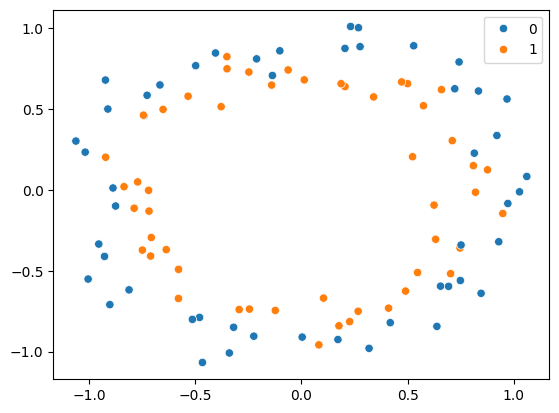

In [73]:
sns.scatterplot(x = x[:, 0], y = x[:, 1], hue = y)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [75]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [77]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = True
)
callback

In [78]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500, verbose = 1, callbacks = callback)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.4398 - loss: 0.6934 - val_accuracy: 0.6000 - val_loss: 0.6886
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5242 - loss: 0.6918 - val_accuracy: 0.5500 - val_loss: 0.6918
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6898 - val_accuracy: 0.6000 - val_loss: 0.6951
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5906 - loss: 0.6880 - val_accuracy: 0.4000 - val_loss: 0.6983
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5680 - loss: 0.6862 - val_accuracy: 0.4000 - val_loss: 0.7016
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5820 - loss: 0.6845 - val_accuracy: 0.4000 - val_loss: 0.7044
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5492 - loss: 0.6861 - val_accuracy: 0.4000 - val_loss: 0.7061
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5688 - loss: 0.6831 - val_accuracy: 0.4000 - val_loss

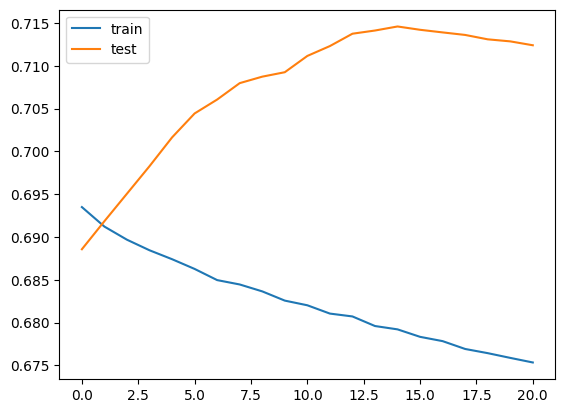

In [79]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()